In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/reduced.txt", delimiter=" ").astype(np.float32)
eeg_data.shape

(24, 76800)

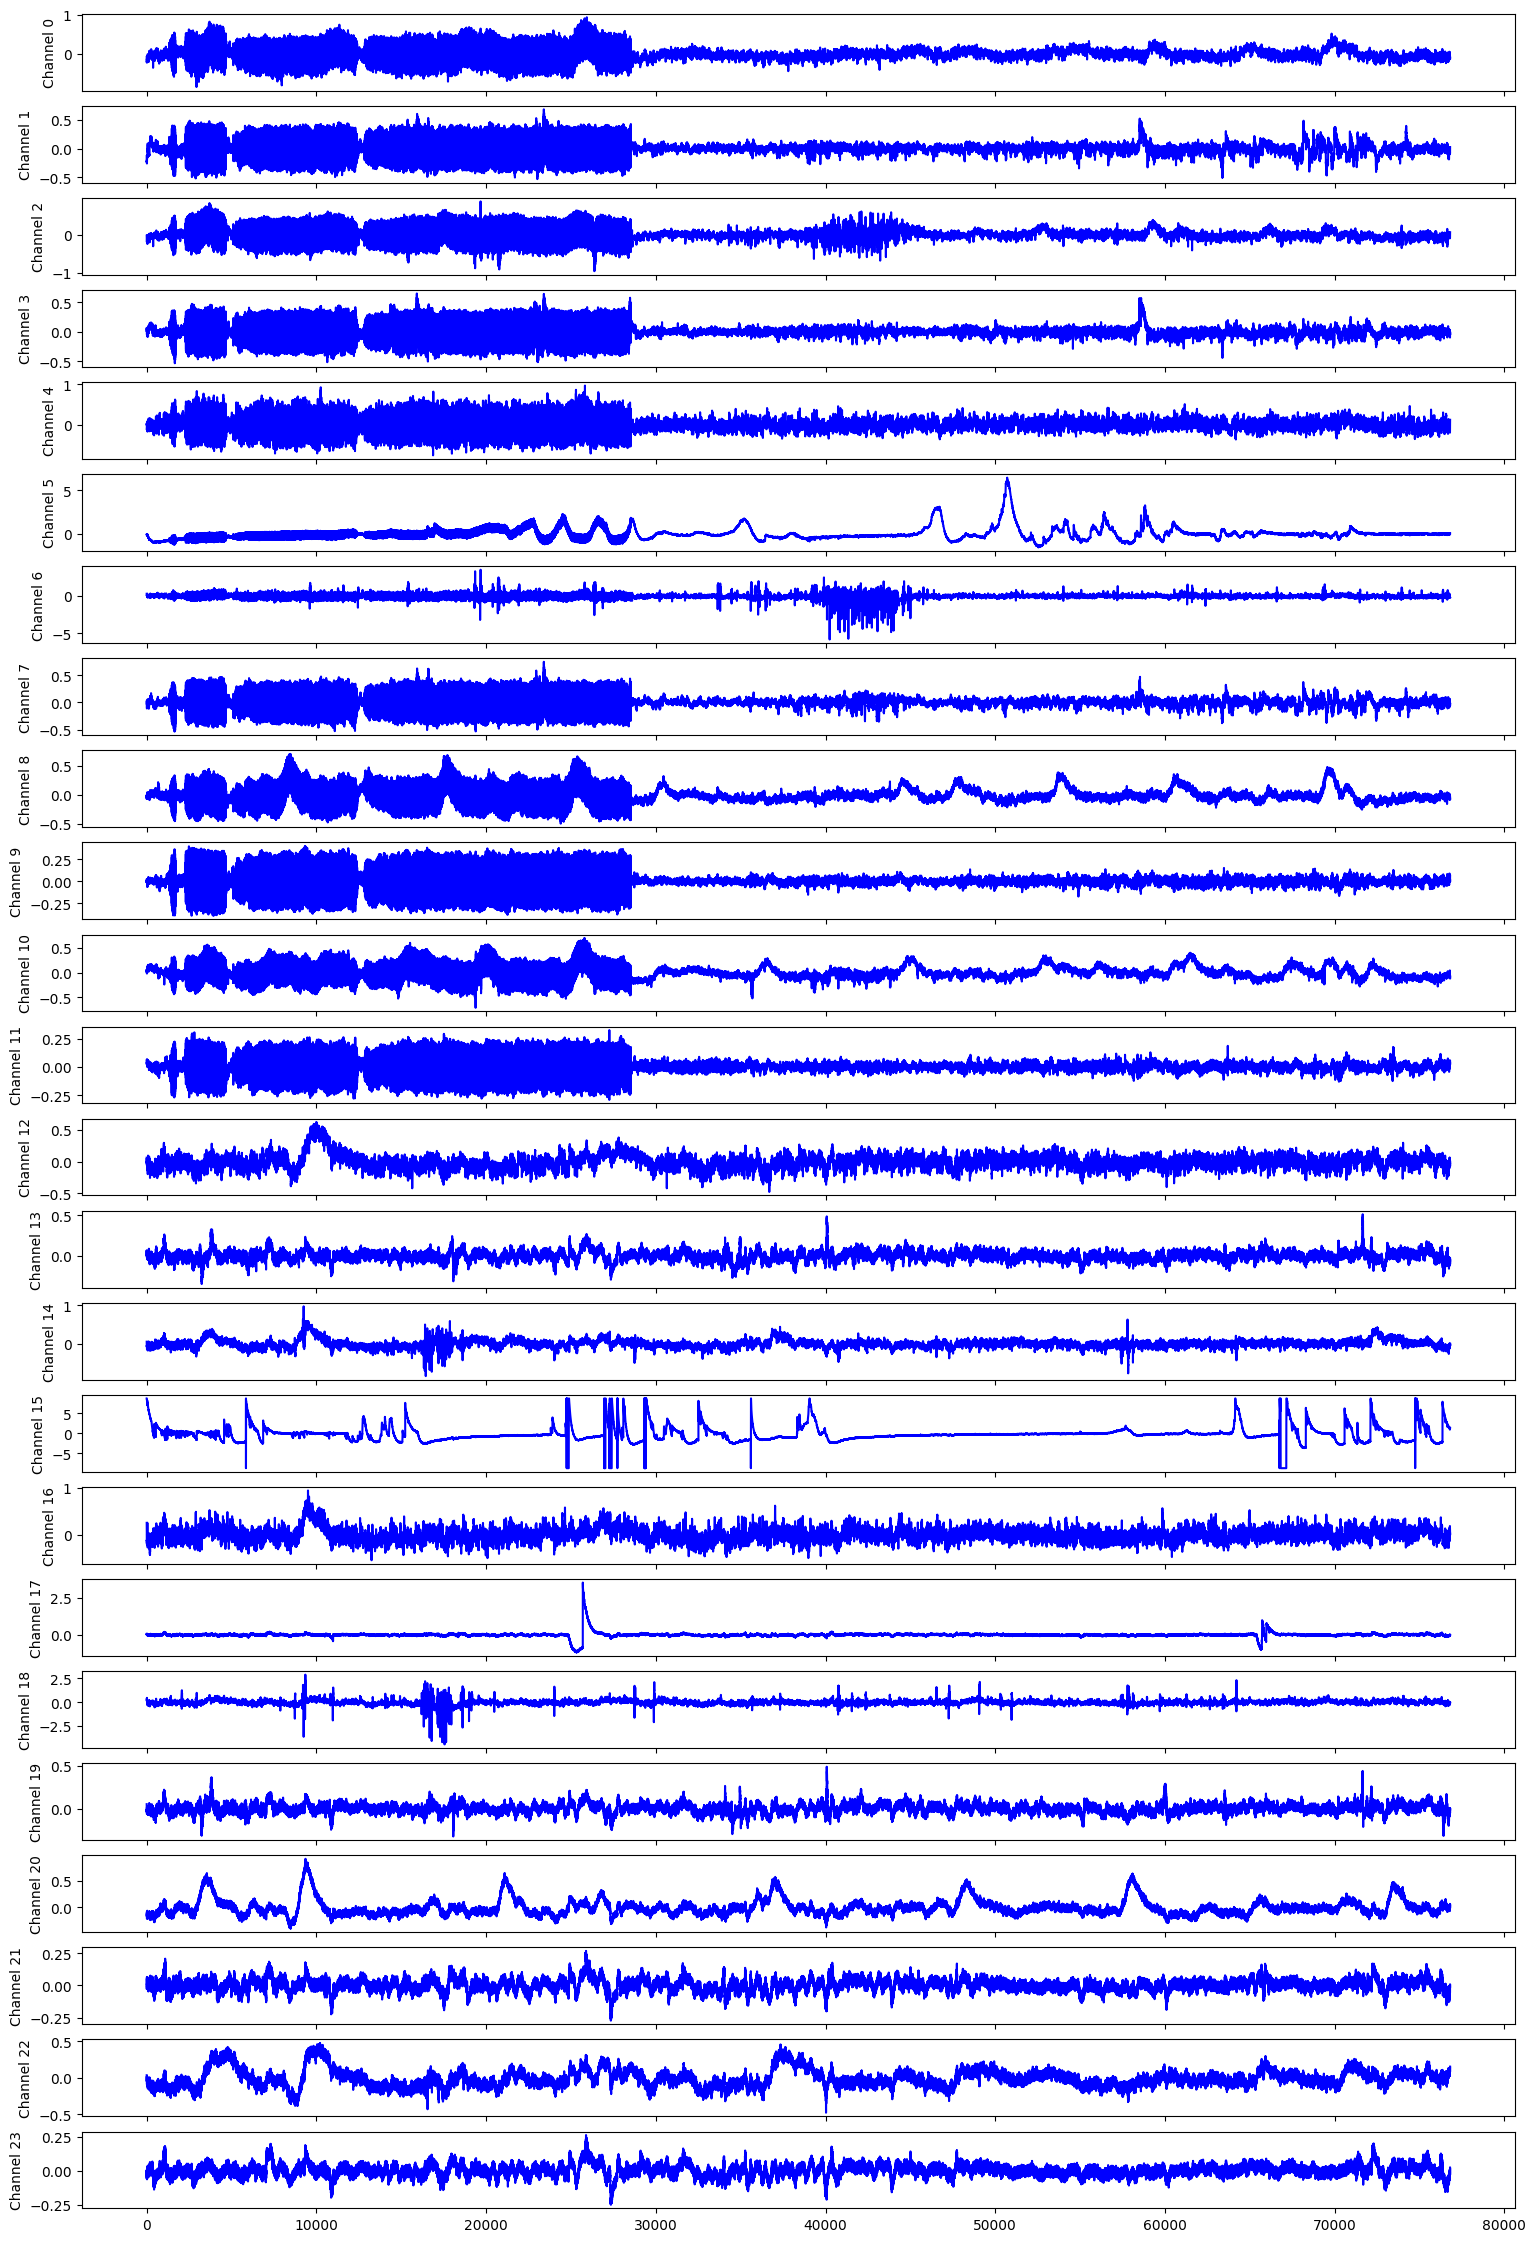

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

## State 1

Detected at `t=28928`.

In [5]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [6]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

In [7]:
# warm up for 20 seconds and determine best lags
# (runs in 5 mins)
fftwarm = CPD.warm.FFTWarm(channels, n0=200, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5']
channel_2: Calculated saliency map :)
channel_5: Calculated saliency map :)
channel_3: Calculated saliency map :)
channel_0: Calculated saliency map :)channel_4: Calculated saliency map :)

channel_1: Calculated saliency map :)
['channel_6', 'channel_7', 'channel_8', 'channel_9', 'channel_10', 'channel_11']
channel_6: Calculated saliency map :)
channel_9: Calculated saliency map :)
channel_8: Calculated saliency map :)
channel_10: Calculated saliency map :)
channel_7: Calculated saliency map :)
channel_11: Calculated saliency map :)
['channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17']
channel_17: Calculated saliency map :)channel_14: Calculated saliency map :)

channel_16: Calculated saliency map :)
channel_13: Calculated saliency map :)
channel_12: Calculated saliency map :)
channel_15: Calculated saliency map :)
['channel_18', 'channel_19', 'channel_20', 'channel_21', 'chann

In [8]:
import CPD.CPD
reload(CPD.CPD)

<module 'CPD.CPD' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\CPD.py'>

In [9]:
cpd = CPD.CPD.Online(fftwarm, k=12, prob=0.80)

In [10]:
change_point = cpd.run()

cpt = max(change_point.values())

print(f"change point detected at t={cpt}")

STEP 200
channel_3 detected change point! Halting.
channel_1 detected change point! Halting.
channel_6 detected change point! Halting.
channel_5 detected change point! Halting.
channel_0 detected change point! Halting.
channel_10 detected change point! Halting.
channel_15 detected change point! Halting.
channel_2 detected change point! Halting.
channel_9 detected change point! Halting.
channel_7 detected change point! Halting.
channel_8 detected change point! Halting.
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
channel_18 detected change point! Halting.
12 channels halted. Halting detection.
change point detected at t=29952


In [11]:
change_point

{'channel_3': 25600,
 'channel_1': 25600,
 'channel_6': 25600,
 'channel_5': 25600,
 'channel_0': 25600,
 'channel_10': 25600,
 'channel_15': 25600,
 'channel_2': 25600,
 'channel_9': 25600,
 'channel_7': 25600,
 'channel_8': 25600,
 'channel_18': 29952}

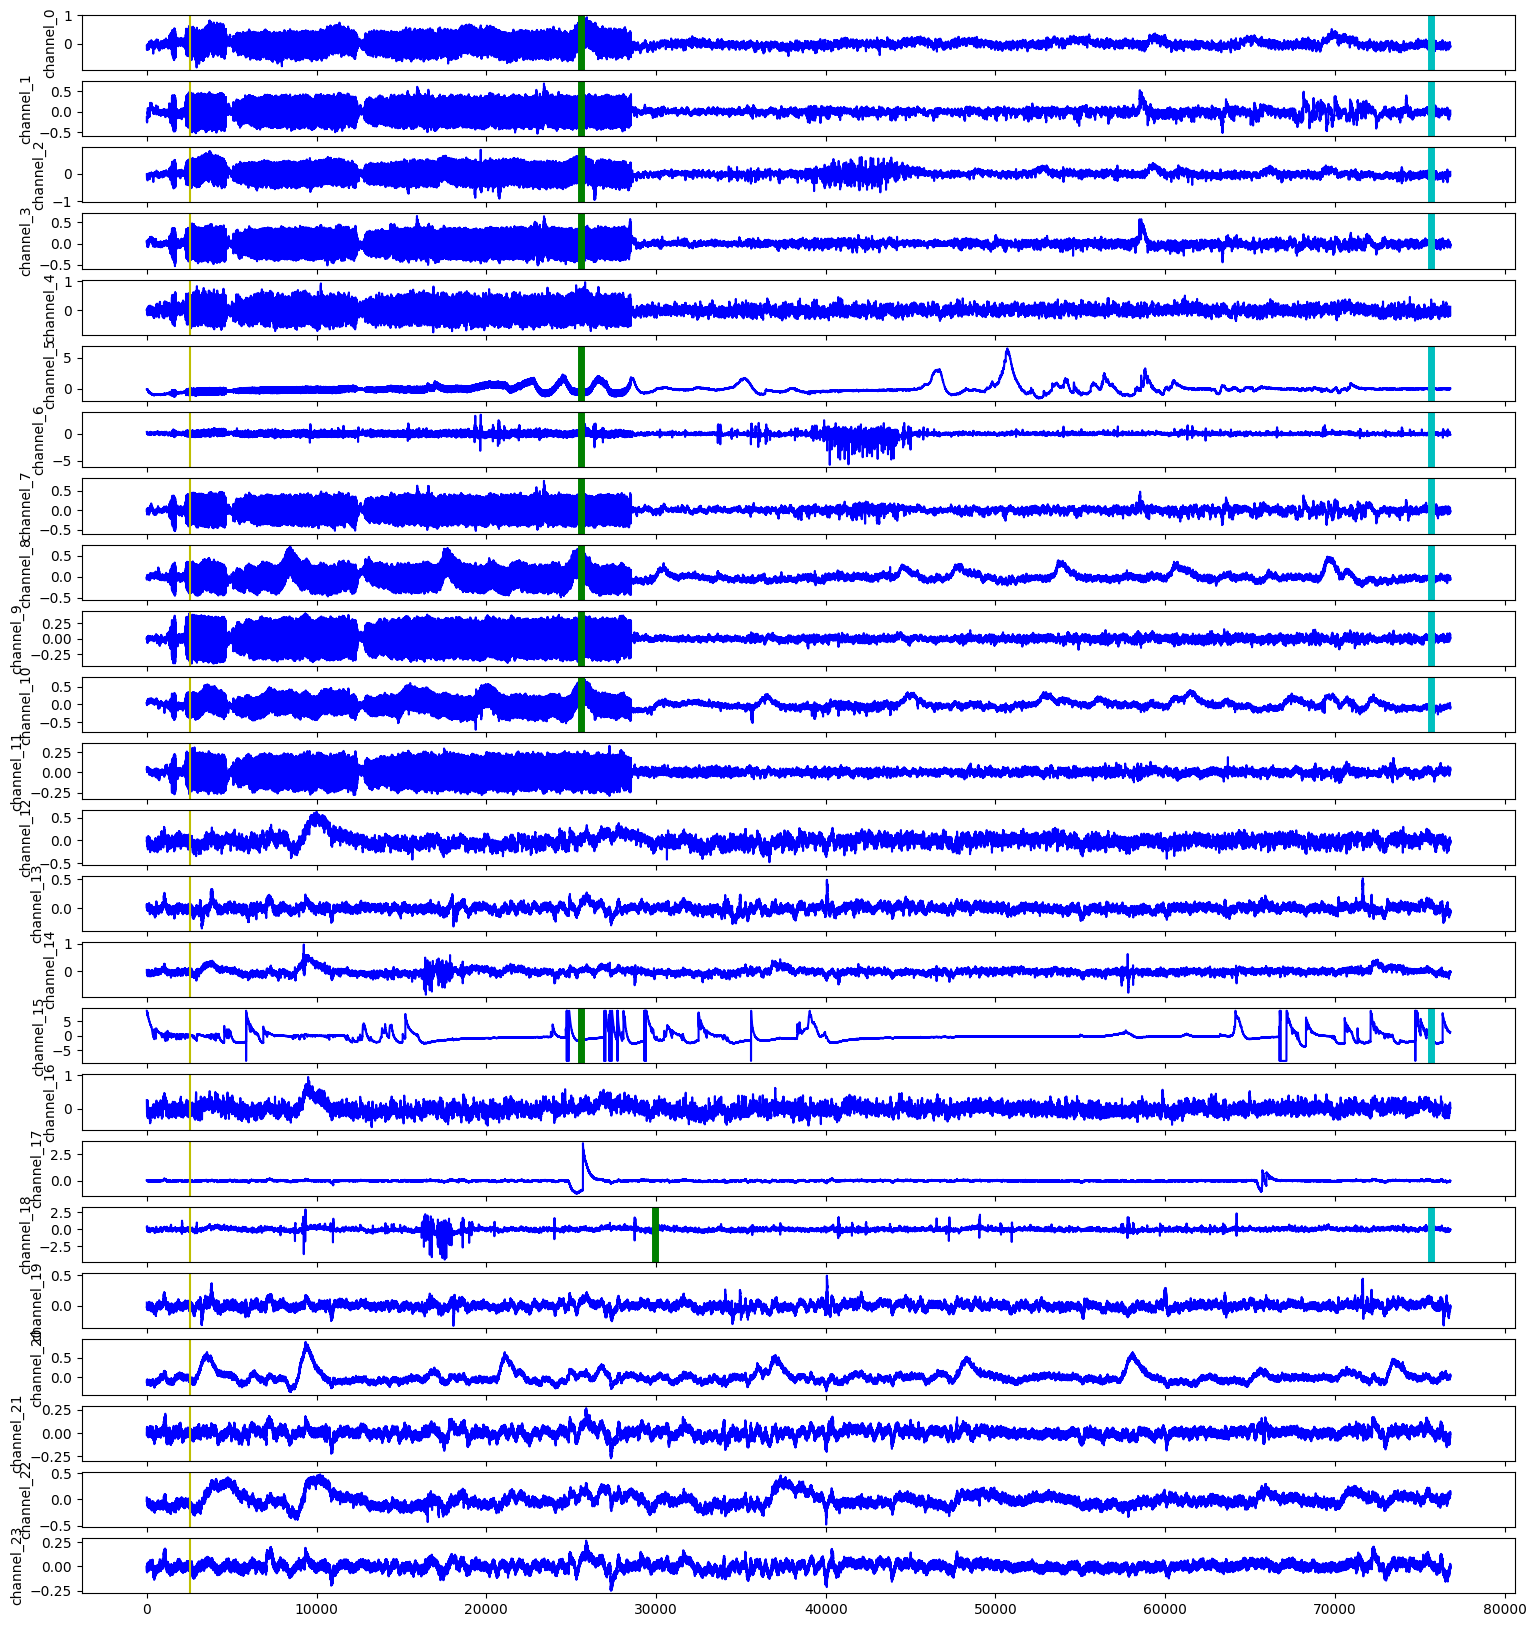

In [13]:
time = [i for i in range(eeg_data.shape[1])]

warmup = 20 * 128
actual_change = 75657

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='y')
    if chan in change_point:
        cpt = change_point[chan]
        axs[c].axvline(x=cpt, c='g', linewidth=5)
        axs[c].axvline(x=actual_change, c='c', linewidth=5)
    axs[c].set_ylabel(chan)

## State 2

Detected at `t=33024`

In [14]:
# get data past detected change-point `t=28928`

post_channels = {}
for i in range(len(eeg_data)):
    post_channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [15]:
post_channels["channel_0"].shape

(46848,)

In [18]:
# warm up for 20 seconds and determine best lags
# (warms up in ~7 mins)

fftwarm2 = CPD.warm.FFTWarm(post_channels, n0=200, chunks=6)
fftwarm2.warmup()

['channel_0', 'channel_1', 'channel_2', 'channel_3']
['channel_4', 'channel_5', 'channel_6', 'channel_7']
['channel_8', 'channel_9', 'channel_10', 'channel_11']
['channel_12', 'channel_13', 'channel_14', 'channel_15']
['channel_16', 'channel_17', 'channel_18', 'channel_19']
['channel_20', 'channel_21', 'channel_22', 'channel_23']


In [20]:
cpd2 = CPD.CPD.Online(fftwarm2, k=12, prob=0.8)

In [21]:
change_points2 = cpd2.run()

cpt2 = max(change_points2.values())

print(f"change point detected at t={cpt2}")

STEP 200
channel_6 detected change point! Halting.
channel_5 detected change point! Halting.
channel_13 detected change point! Halting.
channel_18 detected change point! Halting.
channel_15 detected change point! Halting.
channel_19 detected change point! Halting.
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
channel_9 detected change point! Halting.
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
STEP 235
STEP 236
STEP 237
STEP 238
STEP 239
STEP 240
STEP 241
STEP 242
STEP 243
STEP 244
STEP 245
STEP 246
STEP 247
STEP 248
STEP 249
STEP 250
STEP 251
STEP 252
STEP 253
STEP 254
STEP 255
STEP 256
STEP 257
STEP 258
STEP 259
STEP 260
STEP 261
STEP 262
STEP 263
STEP 264
STEP 265
STEP 266
STEP 267
channel_1 detected change point! Halting.
STEP 268
STEP 269
STEP 270
STEP 271
STEP 272
STE

27072


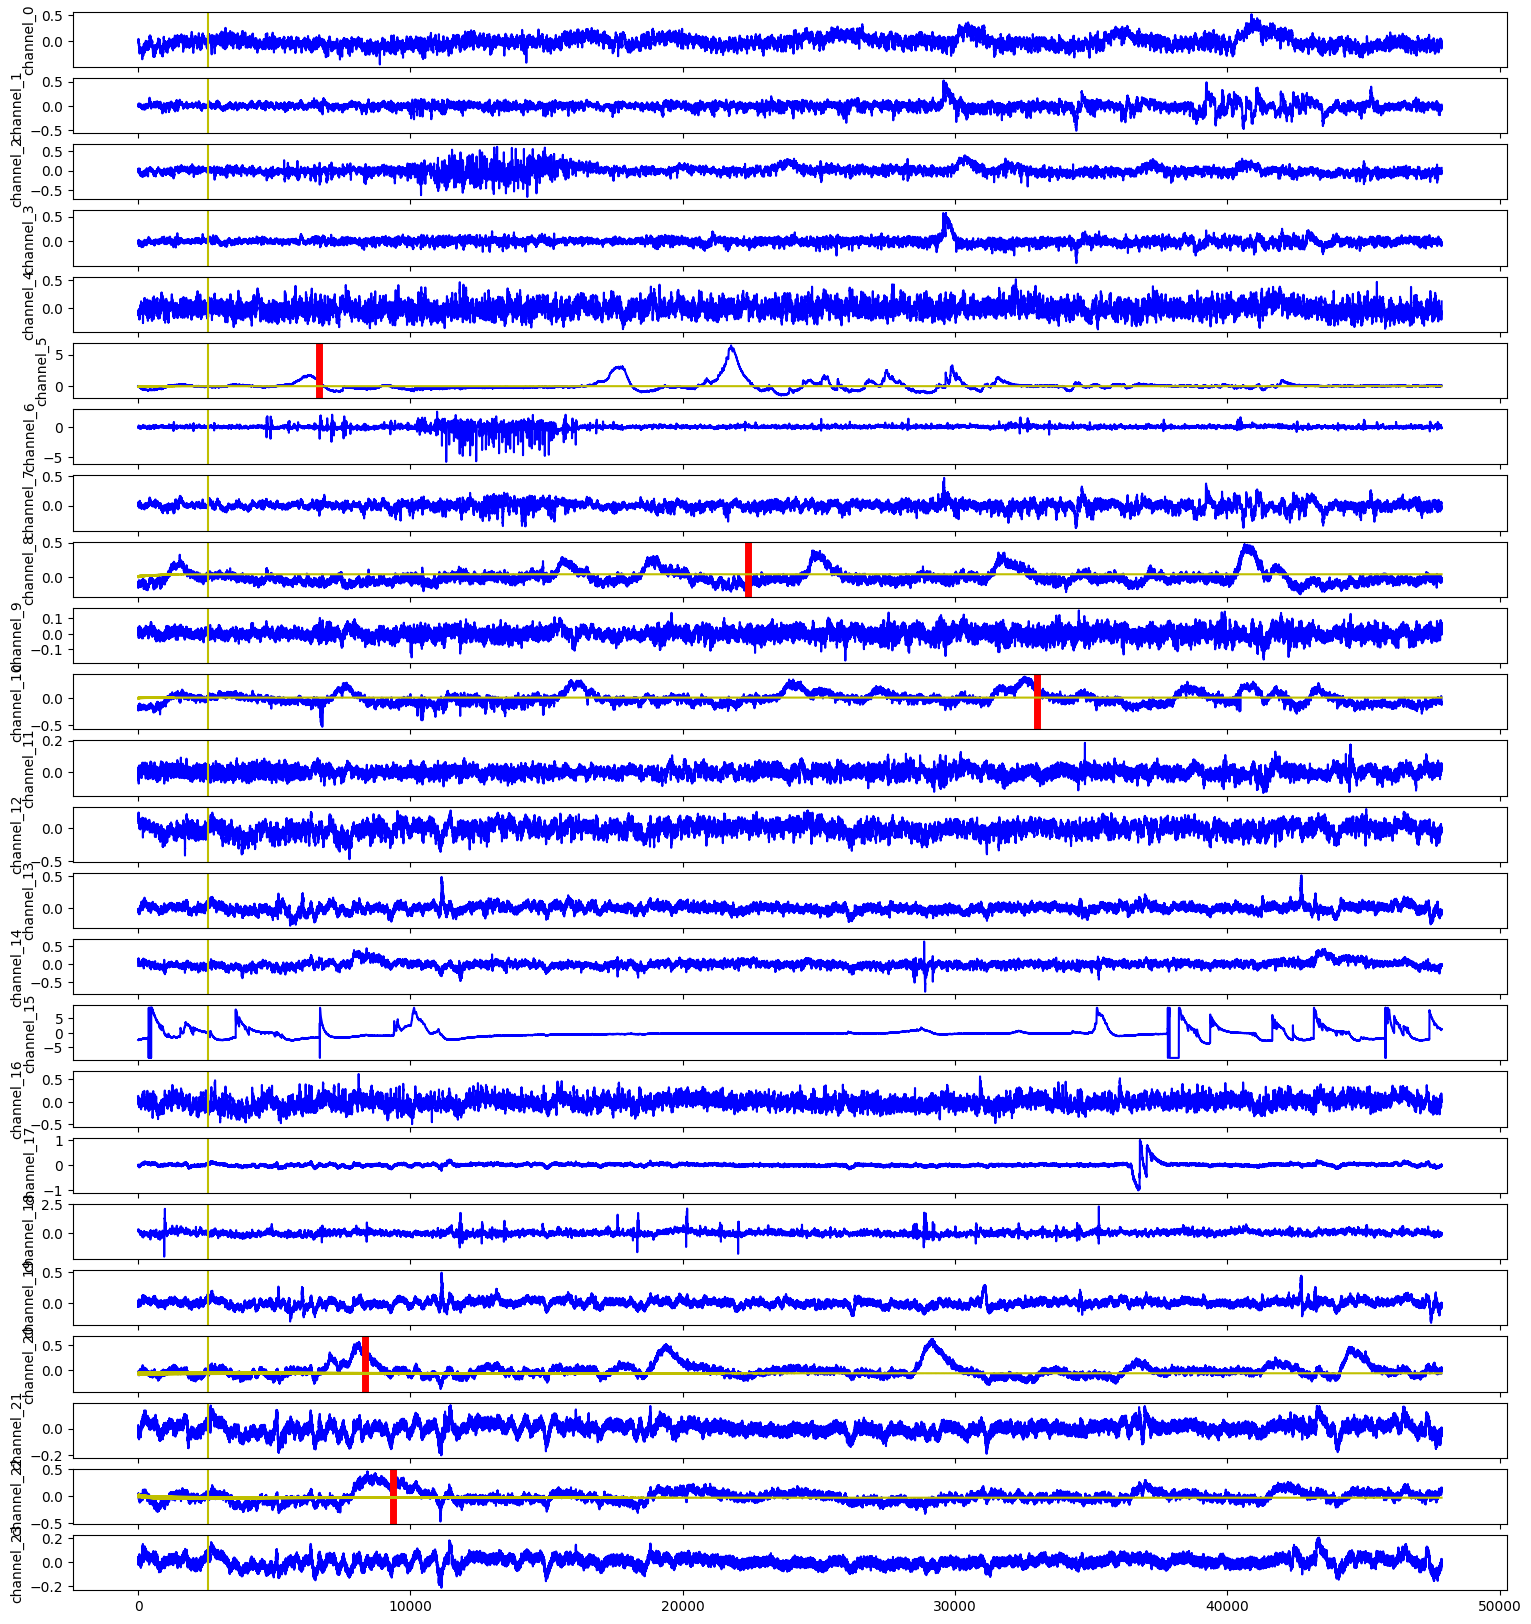

In [156]:
warmup = 20 * 128
# actual_change = 50000 - (cpt - 28000)

time = [i for i in range(post_channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(post_channels), 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, post_channels[chan], 'b')


    if chan in change_points2:
        next_cpt = change_points2[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)


    axs[c].set_ylabel(chan)

print(actual_change)